In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import integrate
import astropy.cosmology.funcs as ap

# QUESTION 1

No.density of photons with energy higher than 13.6 eV at z = 5000 is 3.2315096500502828e+16 /m^3
No.density of photons with energy higher than 13.6 eV at z = 3000 is 8262072353581.238 /m^3
No.density of photons with energy higher than 13.6 eV at z = 1100 is 0.011871315865346472 /m^3


C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_18860/401121581.py:10: RuntimeWarning: overflow encountered in exp
  n = nu**2 / (np.exp((h*nu)/(k*T0*(1 + z))) - 1)


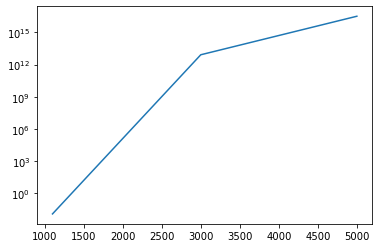

In [113]:
z = np.array([5000,3000,1100])
h = 6.626e-34
v0 = 13.6*1.6e-19/h
c = 3e8
k = 1.38e-23
T0 = 2.7255
nu = np.geomspace(v0,1e150,10000)
N0 = np.zeros(3)
def N(nu,z):
    n = nu**2 / (np.exp((h*nu)/(k*T0*(1 + z))) - 1)
    return n
for i in range(3):
    N0[i] = 8*np.pi*sc.integrate.trapz(N(nu,z[i]),nu)/(c**3)
    print("No.density of photons with energy higher than 13.6 eV at z = %i is"%z[i],N0[i],"/m^3")
z = [5000,3000,1100]

plt.semilogy(z,N0)

# QUESTION 2

Text(0.5, 1.0, 'Ionization fraction vs Redshift')

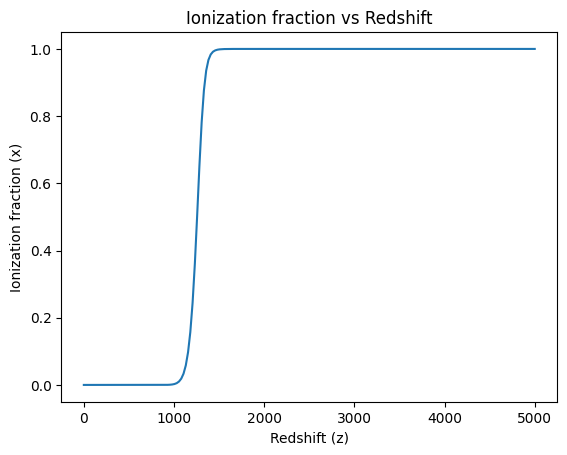

In [4]:
E = 13.6*1.6e-19
k = 1.38e-23
G = 6.67e-11
H0 = 70/(3.086e19)
T0 = 2.7255
c = E/(k*T0)
mp = 1.67e-27
n0 = (0.05*3*(H0**2)/(8*np.pi*G))/mp
z = np.linspace(0,5000,200)
me = 9.1e-31
h = 6.626e-34 / (2*np.pi)
M = (2*np.pi*me*k)**1.5/ (n0*h**3)
def x(z):
    B = M*np.exp(-c/(1 + z))*(1 + z)**(-3/2)
    x = (-B + np.sqrt(B**2 + 4*B))/2

    return x

plt.plot(z,x(z))
plt.ylabel("Ionization fraction (x)")
plt.xlabel("Redshift (z)")
plt.title("Ionization fraction vs Redshift")






# QUESTION 4

In [118]:
ob = 0.05
og = 8.4e-5
om = 0.3
red = np.linspace(1100,5000,100)


def H(z,ob,og):
    return np.sqrt(om*(1 + z)**3 + og*(1 + z)**4)

def cs(z,ob,og):
    return 1/np.sqrt(1 + (3*ob/(4*og))*(1 + z)**(-1))

def inte(z,ob,og):
    return cs(z,ob,og)/H(z,ob,og)



In [115]:
hor = sc.integrate.quad(inte,1100,np.inf,args=(ob,og))[0]
print("Sound horizon size = ",hor)

Sound horizon size =  0.05986329509463965


In [116]:
hor1 = sc.integrate.quad(inte,1100,np.inf,args=(ob*2,og))[0]
print("Sound horizon size for double baryon density = ",hor1)

Sound horizon size for double baryon density =  0.05619387992947013


In [117]:
hor2 = sc.integrate.quad(inte,1100,np.inf,args=(ob/4,og))[0]
print("Sound horizon size for one-fourth baryon density = ",hor2)

Sound horizon size for one-fourth baryon density =  0.06338398548028162


# QUESTION 5


AttributeError: module 'astropy.cosmology.funcs' has no attribute 'angular_diameter_distance'

In [121]:
sc.integrate.quad(inte,1100,np.inf,args=(0.06,og))[0]

0.059051076659658384